In [1]:
'''
visulize the cloth dataset
'''
import pcvae
import utils
import numpy as np
import torch

In [33]:
# read with random permutation
dataset_train = pcvae.PointCloudDataSetFromH5('../data/bagdata.h5')

In [52]:
traindataset = dataset_train.pc_data
print(traindataset.shape)

(16000, 3, 1145)


In [53]:
vislen = 5
batchinput = traindataset[100:100+vislen]

<IPython.core.display.Javascript object>


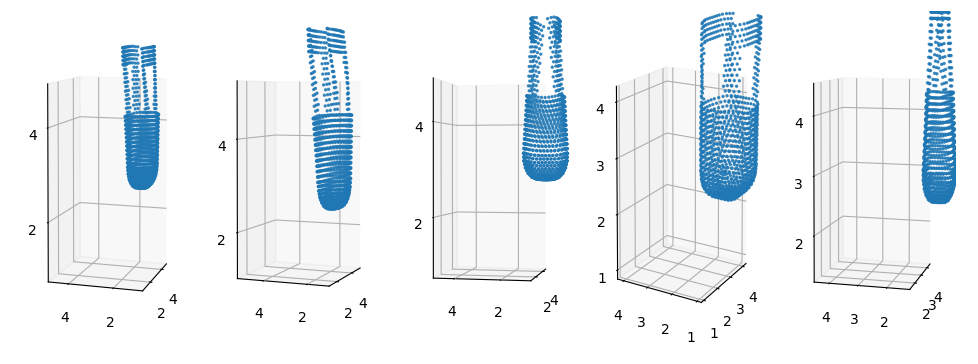

In [54]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure()
ax = [None] *vislen
for i in range(vislen):
    ax[i] = fig.add_subplot(1, vislen, i+1, projection='3d')
    ax[i].axis('on')
    utils.plot_3d_point_cloud(batchinput[i, 0, :], batchinput[i, 2, :], batchinput[i, 1, :], show_axis=True, axis=ax[i])

(1000, 20, 1145, 3)


<IPython.core.display.Javascript object>


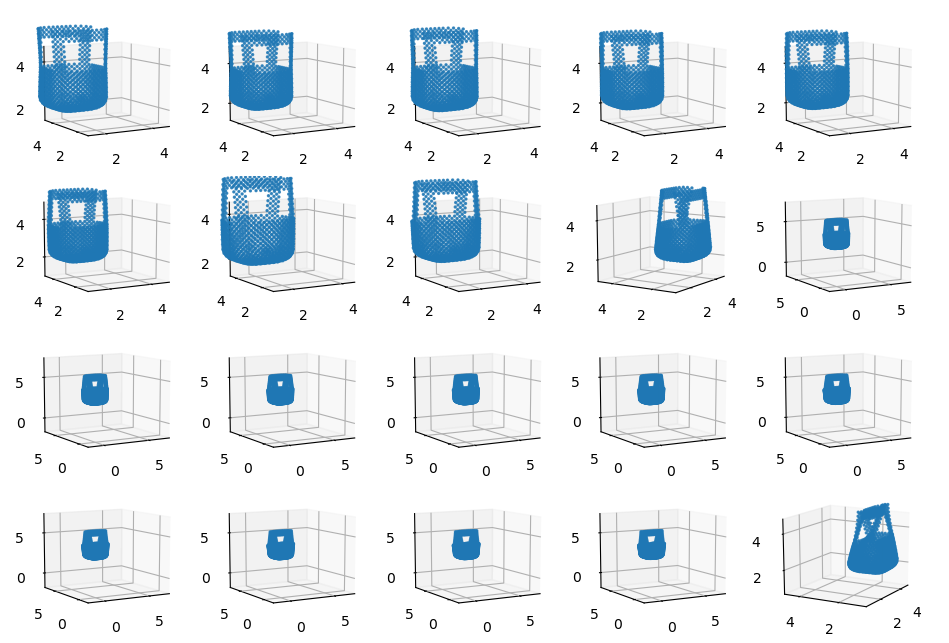

In [61]:
import h5py
# visualize the sequence
full_data = h5py.File('../data/bagdata.h5', "r")
numVideo = full_data['posSeq'].shape[0]
numFrame = full_data['posSeq'].shape[1]
numPoint = full_data['posSeq'].shape[2]
numTotalFrame = numVideo*numFrame

h5data_seqpos = full_data['posSeq'][:].astype(np.float)
# h5data_actionlabel = full_data['actionid'][:].reshape(numVideo*numFrame,numPoint,1).astype(int)
print(h5data_seqpos.shape)
visid = 8
seq = h5data_seqpos[visid,:].transpose(0,2,1)
fig = plt.figure()
ax = [None] *20
for i in range(seq.shape[0]):
    ax[i] = fig.add_subplot(4, seq.shape[0]/4, i+1, projection='3d')
    ax[i].axis('on')
    utils.plot_3d_point_cloud(seq[i, 0, :], seq[i, 2, :], seq[i, 1, :], show_axis=True, axis=ax[i])
    